# **FOR STRUCTURED IRIS DATASET**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [33]:
#sdata = pd.read_csv("iris.csv")
#df = pd.DataFrame(sdata)
sdata = load_iris(as_frame=True)
df = sdata.frame


In [34]:
print("Columns:",list(df.columns))

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [35]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
target_col = df.columns[-1]
print("Target column detected:", target_col)

Target column detected: target


In [37]:
print(df[target_col].value_counts())

target
0    50
1    50
2    50
Name: count, dtype: int64


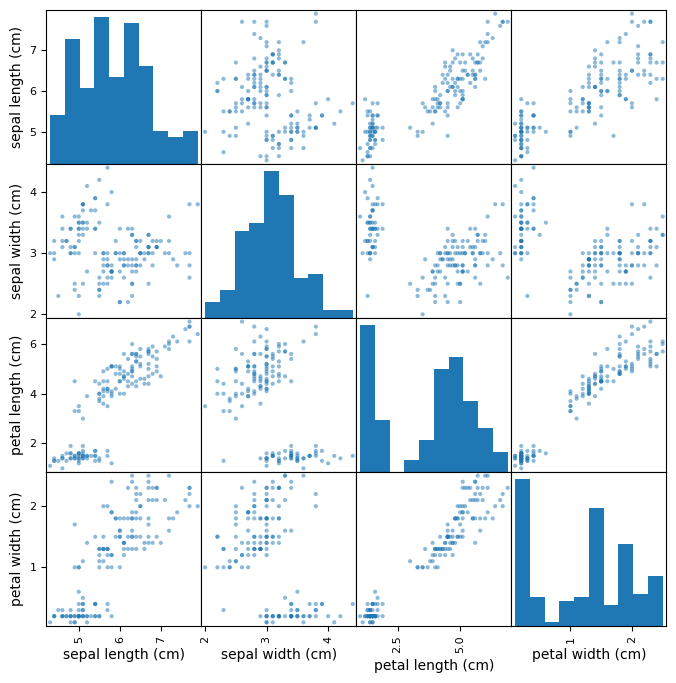

In [38]:
pd.plotting.scatter_matrix(df.iloc[:,0:4], figsize = (8,8))
plt.show()

# **FOR UNSTRUCTURED IRIS DATASET**

In [39]:
data = pd.read_csv("C:\\Users\\Kishan Pawar\\Downloads\\iris.data.csv")
df2 = pd.DataFrame(data)

In [40]:
df2

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
print("Columns:",list(df2.columns))

Columns: ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']


In [42]:
print("\nFirst 5 rows:")
df2.head()


First 5 rows:


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [43]:
target_col = df2.columns[-1]
print("Target column detected:", target_col)

Target column detected: Iris-setosa


In [44]:
print(df2[target_col].value_counts())

Iris-setosa
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64


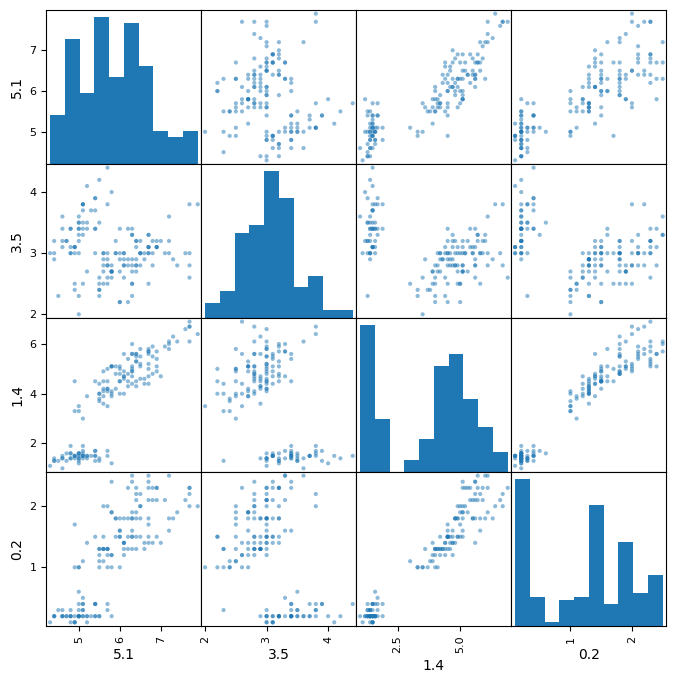

In [45]:
pd.plotting.scatter_matrix(df2.iloc[:,0:4], figsize = (8,8))
plt.show()

# **DATA PREPROCESSING**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [47]:
df3 = pd.read_csv("titanic.csv")
df3

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [ ]:
DROP_COLS = ['PassengerId', 'Name', 'Ticket', 'Cabin']
for c in DROP_COLS:
    if c in df.columns:
        df3 = df3.drop(columns=c)

In [ ]:
y = df3.Survived
X = df3.drop(columns=['Survived'])

In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()
print('Numeric:', num_cols)
print('Categorical:', cat_cols)

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocess = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_pre = preprocess.fit_transform(X_train)
print('Transformed training shape:', X_train_pre.shape)